In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv('supermarket_sales .csv')

#### Q1.Show first 5 records of dataset?

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales['Branch'].ndim

1

In [5]:
sales.ndim

2

#### Q2.How many records and columns are in dataset?

In [6]:
sales.shape

(1000, 17)

1000 records and 17 columns

#### Q3.Show the datatypes of different columns.handle the missing values.

In [7]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
# handle the missing values.
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

no null values 

#### Q4.What was the total number of sales? What branch has the highest number of sales?

In [9]:
# i) Total number of sales
sales['Total'].count()

1000

In [10]:
# ii) what branch has the highest number of sales?
sales['Branch'].value_counts()
# or sales['Branch'].mode()

A    340
B    332
C    328
Name: Branch, dtype: int64

Branch A has highest number of sales

#### Q5.What type of product is sold the most?

In [11]:
sales['Product line'].value_counts()
# or sales['Product line'].mode()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

most type of product sold is Fashion accessories

#### Q6.What is the average sales of electoniv=cs accessories?

In [12]:
g = sales.groupby('Product line')
g.get_group('Electronic accessories')['Total'].mean()

319.6325382352942

average sale of electronic accessories = 319.63

#### Q7.What gender buy more items in each category? what is the category?

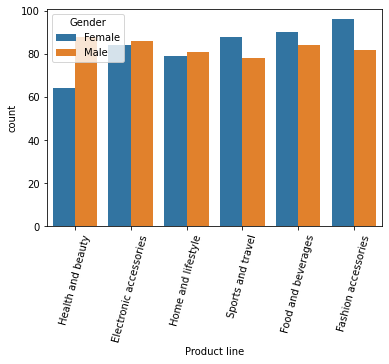

In [13]:
sns.countplot(sales['Product line'],hue = sales['Gender'])
plt.xticks(rotation = 75)
plt.show()

1. In Health and beauty Male bought more items than female
2. In Electronic accessories Male bought more items than female
3. In Home and lifestyle Male bought more items than female
4. In Sports and travel FeMale bought more items than male
5. In Food and beverages FeMale bought more items than male
6. In Fashion accessories FeMale bought more items than male

#### Q8.What is the favorite method of payment of the members? of the normal customers?

In [14]:
normal_members = sales.loc[sales['Customer type']=='Normal']
normal_members['Payment'].mode()

0    Ewallet
Name: Payment, dtype: object

Ewallet is favorite method of payment of the members of the normal customers

#### Q9.What time should we display an advertisement to maximize the revenue?

In [15]:
sales['Time'].mode()

0    14:42
1    19:48
Name: Time, dtype: object

around 14:42 and 19:48 we should display an advertisement to maximize the revenue

#### Q10.What does the customer rating look like and is it skewed?

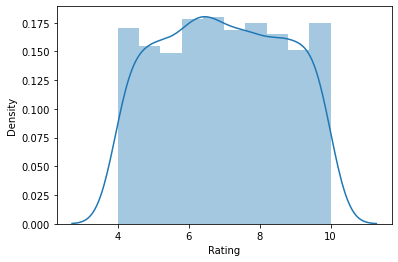

In [16]:
sns.distplot(sales['Rating'])
plt.show()

most of the ratings are between 4 and 10 and they are neither left skewed nor right skewed 

#### Q11.Does gross income affect the ratings that the customers provide?

<AxesSubplot:xlabel='gross income', ylabel='Rating'>

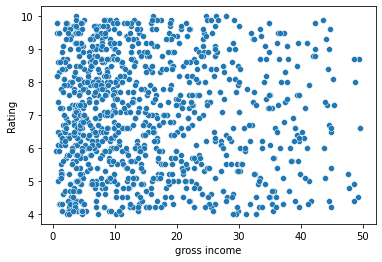

In [17]:
sns.scatterplot(x = sales['gross income'],y =sales['Rating'])

In [18]:
sales['gross income'].corr(sales['Rating'])

-0.03644170499701838

from the scatterplot we can say that gross income doesnt affect the ratings that the customers provide

however from correlation it is found that relation between gross income and rating is weakly negative

which means gross income at very low level affects the ratings(as the gross income increases hardly noticeable ratings decreases)

#### Q12.Is there any relationship between Gender and Gross income?

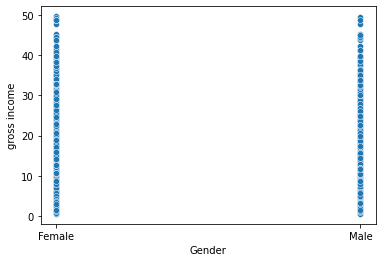

In [19]:
sns.scatterplot(x = sales['Gender'],y = sales['gross income'])
plt.show()

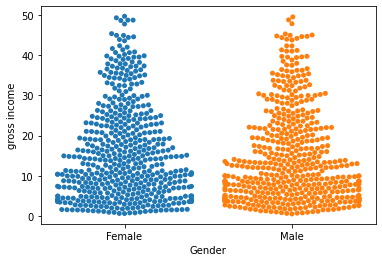

In [20]:
sns.swarmplot(x=sales['Gender'] ,y = sales['gross income'])
plt.show()    

from the interpreting both graphs we can say that there is no relationship between gender and gross income

#### Q13.What is the spending pattern of females and males and in which category do they spend a lot?

In [23]:
x=sales.groupby(['Gender','Product line'])['Total'].sum().sort_values(ascending=False)
x

Gender  Product line          
Female  Food and beverages        33170.9175
Male    Health and beauty         30632.7525
Female  Fashion accessories       30437.4000
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
Female  Electronic accessories    27102.0225
Male    Sports and travel         26548.1055
        Fashion accessories       23868.4950
        Home and lifestyle        23825.0355
        Food and beverages        22973.9265
Female  Health and beauty         18560.9865
Name: Total, dtype: float64

#### Q14.Analyze the pairwise relationship between the numeric variables?

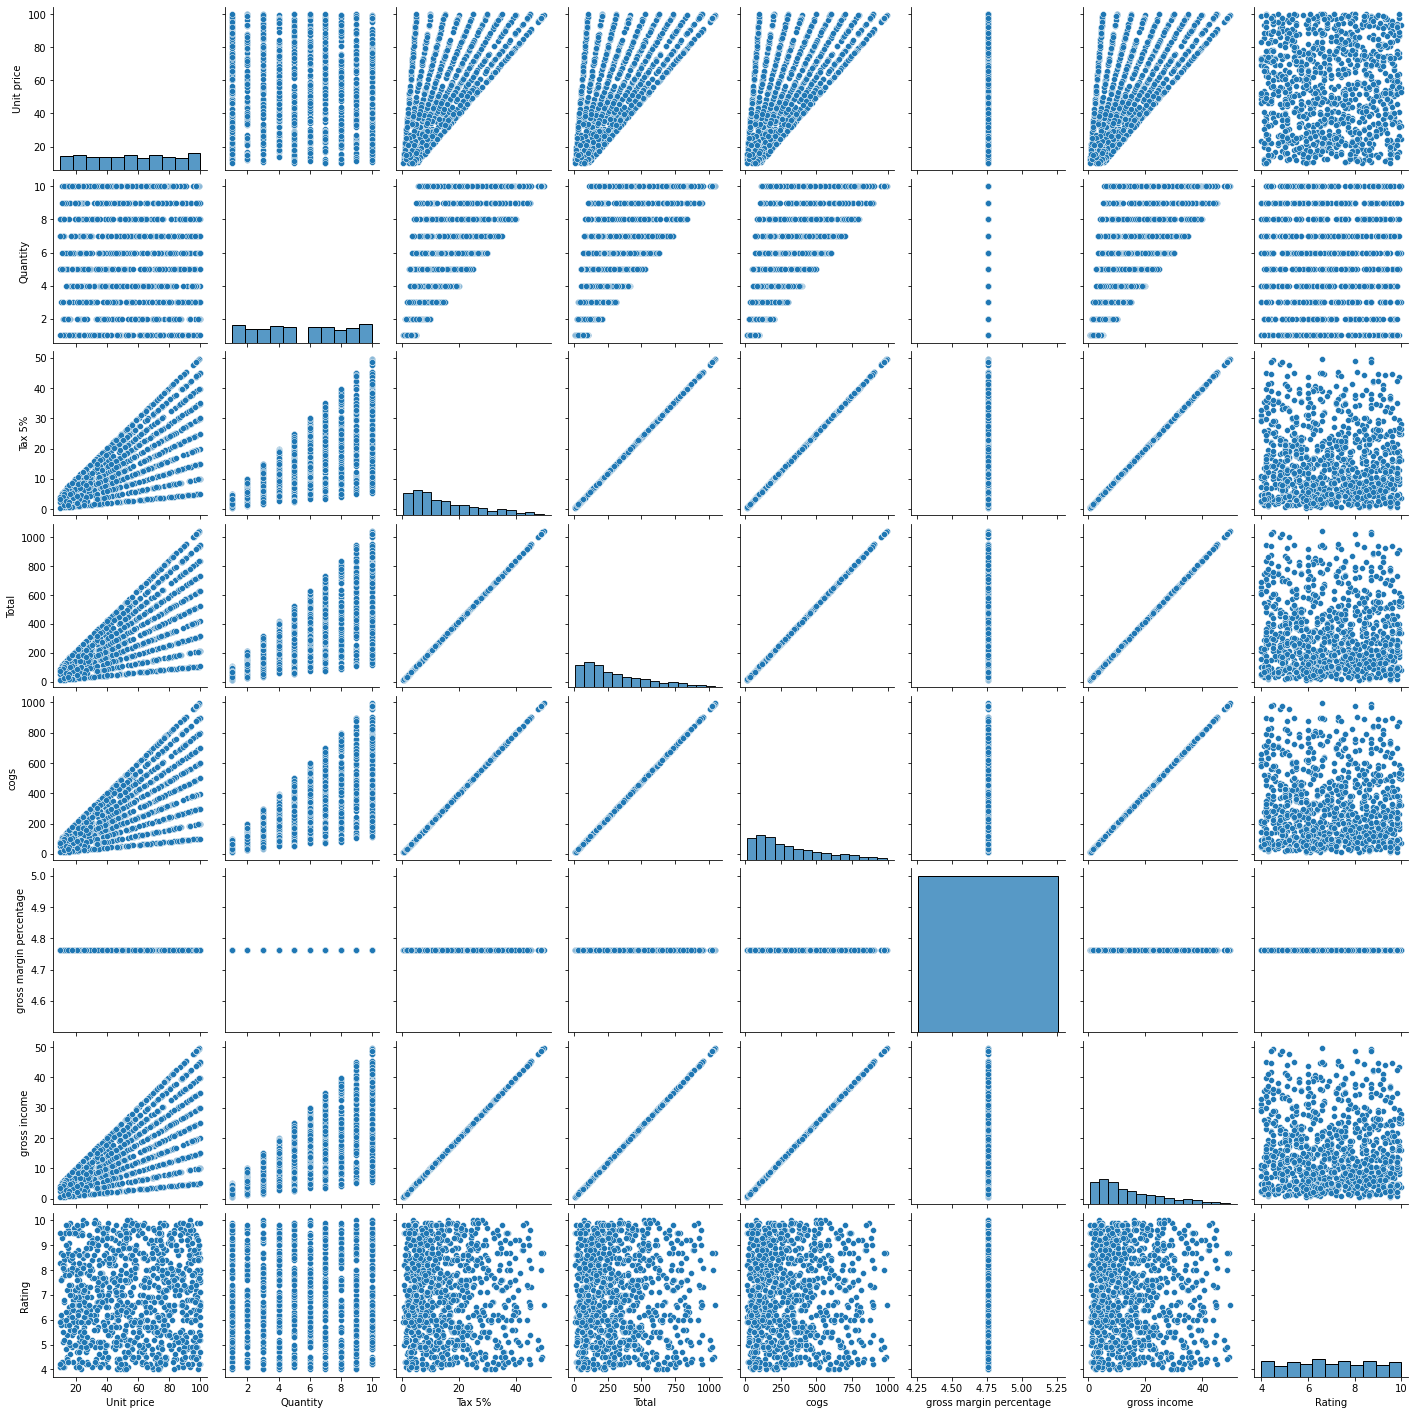

In [22]:
sns.pairplot(sales)
plt.show()